In [572]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype
sns.set()


In [573]:
survey=pd.read_csv("../Data_raw/survey_data.csv", sep=",")

In [574]:
usage=pd.read_csv("../Data_raw/survey_users_app_usage.csv", sep=",")

In [575]:
# There are 6187 observations
survey.tail(3)

,user_id,age,annual_income,country,duolingo_platform,duolingo_subscriber,duolingo_usage,employment_status,future_contact,gender,other_resources,primary_language_commitment,primary_language_review,primary_language_motivation,primary_language_motivation_followup,primary_language_proficiency,student,survey_complete,time_spent_seconds
6184,35cd250f72c911e9b9a1dca9049399ef,55 - 74,"$151,000 or more",GB,iPhone or iPad,"No, I have never paid for Duolingo Plus",I don't use Duolingo,Employed full-time,No,Female,"Stories/novels/children's books,Movies/TV Show...",I'm extremely committed to learning this langu...,I am using Duolingo to review a language I've ...,I want to advance professionally or economically,Learning this language will help me get a bett...,Beginner,Full-time student,1,-114
6185,35cf7a1772c911e9b029dca9049399ef,55 - 74,"$26,000 - $75,000",FR,Android phone or tablet,"Yes, I currently pay for Duolingo Plus",Daily,Retired,No,Male,NaN,I'm very committed to learning this language.,I am using Duolingo to review a language I've ...,I want to keep my brain healthy,NaN,Beginner,Not currently a student,1,-284
6186,35ca480c72c911e993b8dca9049399ef,55 - 74,NaN,JP,iPhone or iPad,"Yes, I currently pay for Duolingo Plus",Daily,Retired,Yes,Female,Other apps,I'm moderately committed to learning this lang...,I am using Duolingo to learn this language for...,I want to improve relationships with some of t...,NaN,Beginner,Not currently a student,1,-285


In [576]:
# There are 6149 observations
usage.tail(3)

,user_id,duolingo_start_date,daily_goal,highest_course_progress,took_placement_test,purchased_subscription,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform
6146,35cbcbb572c911e9807ddca9049399ef,9/24/15 1:15,NaN,-5.0,False,False,NaN,27,29.0,58.0,2,1137
6147,35cffde372c911e9b4afdca9049399ef,6/17/18 6:55,20.0,-3.0,False,False,19.0,94,192.0,185.0,44,140
6148,35cec29c72c911e9b6d3dca9049399ef,10/30/17 7:17,NaN,-6.0,True,False,33.0,12,39.0,32.0,4,370


In [577]:
# read the file again with parse_dates
usage=pd.read_csv("../Data_raw/survey_users_app_usage.csv", parse_dates=["duolingo_start_date"])
usage.tail(3)

,user_id,duolingo_start_date,daily_goal,highest_course_progress,took_placement_test,purchased_subscription,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform
6146,35cbcbb572c911e9807ddca9049399ef,2015-09-24 01:15:00,NaN,-5.0,False,False,NaN,27,29.0,58.0,2,1137
6147,35cffde372c911e9b4afdca9049399ef,2018-06-17 06:55:00,20.0,-3.0,False,False,19.0,94,192.0,185.0,44,140
6148,35cec29c72c911e9b6d3dca9049399ef,2017-10-30 07:17:00,NaN,-6.0,True,False,33.0,12,39.0,32.0,4,370


In [578]:
survey.describe()

,survey_complete,time_spent_seconds
count,6187.000000,6187.000000
mean,0.925974,3325.057055
std,0.261835,26268.864929
min,0.000000,-297.000000
25%,1.000000,234.000000
50%,1.000000,325.000000
75%,1.000000,470.000000
max,1.000000,584939.000000


In [579]:
usage.describe()

,daily_goal,highest_course_progress,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform
count,2687.000000,6135.000000,5857.000000,6149.000000,5993.000000,5993.000000,6149.000000,6149.000000
mean,25.853740,27.314914,107.126515,49.150106,249.929918,233.634741,154.855586,615.571963
std,13.707093,20.179992,97.168490,39.212910,300.918632,284.536445,617.272874,594.823322
min,1.000000,-10.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000
25%,20.000000,10.000000,30.000000,12.000000,55.000000,49.000000,3.000000,99.000000
50%,20.000000,26.000000,81.000000,44.000000,166.000000,153.000000,17.000000,417.000000
75%,30.000000,38.000000,160.000000,85.000000,332.000000,311.000000,88.000000,1002.000000
max,50.000000,83.000000,617.000000,289.000000,4786.000000,4686.000000,6000.000000,2402.000000


# 1. Investigate survey data

In [580]:
# There are only 6150 unique user Id's, there are 6187 survey obsevation 
survey.nunique()

user_id                                 6150
age                                        5
annual_income                              5
country                                   10
duolingo_platform                          3
duolingo_subscriber                        4
duolingo_usage                             5
employment_status                          4
future_contact                             2
gender                                     4
other_resources                          252
primary_language_commitment                5
primary_language_review                    2
primary_language_motivation               13
primary_language_motivation_followup     146
primary_language_proficiency               3
student                                    3
survey_complete                            2
time_spent_seconds                      1305
dtype: int64

In [581]:
survey.isnull().sum(axis=0)

user_id                                    0
age                                      349
annual_income                           1005
country                                    0
duolingo_platform                        276
duolingo_subscriber                      286
duolingo_usage                           276
employment_status                        457
future_contact                           741
gender                                   349
other_resources                         1713
primary_language_commitment              165
primary_language_review                  173
primary_language_motivation              239
primary_language_motivation_followup    2472
primary_language_proficiency             160
student                                  664
survey_complete                            0
time_spent_seconds                         0
dtype: int64

In [582]:
# Identify which users took surveys more than once. 37 users took the survey twice
user_list=survey.user_id.value_counts()
repeated_users=user_list[user_list >1]
len(repeated_users)

37

In [583]:
# Are some users sharing the same account? 
# The same user_id is reported from DE and JP, RU and FR for example
survey[survey.user_id.isin(repeated_users.index.to_list())].sort_values("user_id").head(10)

,user_id,age,annual_income,country,duolingo_platform,duolingo_subscriber,duolingo_usage,employment_status,future_contact,gender,other_resources,primary_language_commitment,primary_language_review,primary_language_motivation,primary_language_motivation_followup,primary_language_proficiency,student,survey_complete,time_spent_seconds
30,35ca11b872c911e984abdca9049399ef,18-34,"$11,000 - $25,000",JP,iPhone or iPad,"No, I have never paid for Duolingo Plus",Daily,Employed part-time,Yes,Female,"Speak with others (language events, conversati...",I'm extremely committed to learning this langu...,I am using Duolingo to learn this language for...,I want to challenge myself,NaN,Beginner,Full-time student,1,169
447,35ca11b872c911e984abdca9049399ef,18-34,"$0 - $10,000",JP,iPhone or iPad,"No, I have never paid for Duolingo Plus",Daily,Employed part-time,Yes,Female,Online language class,I'm extremely committed to learning this langu...,I am using Duolingo to learn this language for...,I want to challenge myself,NaN,Beginner,Part-time student,1,346
6064,35ca57a372c911e98c79dca9049399ef,35 - 54,NaN,DE,Android phone or tablet,"No, I have never paid for Duolingo Plus",Daily,Employed full-time,Yes,Male,Other apps,I'm very committed to learning this language.,I am using Duolingo to learn this language for...,I need to be able to speak the local language ...,I am studying abroad,Beginner,Not currently a student,1,243
6030,35ca57a372c911e98c79dca9049399ef,18-34,"$11,000 - $25,000",JP,iPhone or iPad,"No, I have never paid for Duolingo Plus",Daily,Unemployed,Yes,Male,"Textbooks,Stories/novels/children's books,Movi...",I'm extremely committed to learning this langu...,I am using Duolingo to learn this language for...,I want my family to learn a language together,NaN,Intermediate,Not currently a student,1,311
6035,35ca6ffa72c911e993bcdca9049399ef,18-34,"$26,000 - $75,000",JP,iPhone or iPad,"Yes, I currently pay for Duolingo Plus",Daily,Employed full-time,Yes,Female,Movies/TV Shows,I'm extremely committed to learning this langu...,I am using Duolingo to review a language I've ...,I am preparing for a trip,I want to communicate with locals in a meaning...,Intermediate,Not currently a student,1,150
6069,35ca6ffa72c911e993bcdca9049399ef,55 - 74,"$0 - $10,000",DE,Web browser,"No, I have never paid for Duolingo Plus",Daily,Retired,Yes,Female,Textbooks,I'm very committed to learning this language.,I am using Duolingo to review a language I've ...,I want to keep my brain healthy,NaN,Beginner,Not currently a student,1,368
207,35ca8d8272c911e99a76dca9049399ef,55 - 74,"$151,000 or more",JP,iPhone or iPad,"Yes, I currently pay for Duolingo Plus",Daily,Retired,Yes,Female,Other (please specify),I'm extremely committed to learning this langu...,I am using Duolingo to review a language I've ...,I want to improve relationships with some of t...,I want to better communicate with my significa...,Beginner,Not currently a student,1,300
2906,35ca8d8272c911e99a76dca9049399ef,55 - 74,"$151,000 or more",JP,iPhone or iPad,"Yes, I currently pay for Duolingo Plus",Daily,Retired,Yes,Female,"Other apps,Other (please specify)",I'm extremely committed to learning this langu...,I am using Duolingo to review a language I've ...,I want to improve relationships with some of t...,I want to better communicate with my significa...,Beginner,Not currently a student,1,273
6026,35cace8a72c911e9b1b4dca9049399ef,18-34,"$0 - $10,000",RU,iPhone or iPad,"No, I have never paid for Duolingo Plus",Less than once a month,Employed full-time,Yes,Male,NaN,I'm slightly committed to learning this language.,I am using Duolingo to learn this language for...,I need to be able to speak the local language ...,"I am an immigrant,I am studying abroad",Beginner,Not currently a student,1,230
6060,35cace8a72c911e9b1b4dca9049399ef,35 - 54,"$26,000 - $75,000",FR,iPhone or iPad,"No, but I have previously paid for Duolingo Plus",Daily,Employed part-time,Yes,Female,Textbooks,I'm moderately committed to learning this lang...,I

In [584]:
# Five age groups. No typos in categories. How should we guess the age for people with no age info? 
survey.age.value_counts()
# One idea: (15*329+26*2019+64.5*1572+44.5*2019+85*139) / (2019+1779+1572+329+139)
# Assign them to 35-54 group. This is also the group with most users. 

35 - 54        2019
18-34          1779
55 - 74        1572
Under 18        329
75 or older     139
Name: age, dtype: int64

In [585]:
# Five income groups. How should we guess the income for people with no income info? 
survey.annual_income.value_counts()
# 32.5K if we assume 151k ore more's mean is 300
# (5*1829+(75-26)/2*1437+(25-11)/2*1017+(150-76)/2*581+300*318)/(1829+1437+1017+581+318)
# 26.4K if we assume 151k ore more's mean is 200
# (5*1829+(75-26)/2*1437+(25-11)/2*1017+(150-76)/2*581+300*318)/(1829+1437+1017+581+318)
# Assign them to 26-75 K group. 

$0 - $10,000          1829
$26,000 - $75,000     1437
$11,000 - $25,000     1017
$76,000 - $150,000     581
$151,000 or more       318
Name: annual_income, dtype: int64

In [586]:
# Confirm that there are no typos, and the country codes are two digits. 
# Think about grouping them by continent? 
# France, Japan, Mexico, Russia, UK, Germany, US, Belize, Colombia, Taiwan
# Where does Russia go...?
# Should UK be grouped with US since they also speak English? 
# France, Germany, UK, Russia
# Japan, Taiwan
# US
# Mexico, Belize, Colombia
survey.country.value_counts()

FR    1006
JP     899
MX     892
RU     684
GB     658
DE     625
US     459
BR     375
CO     314
TW     275
Name: country, dtype: int64

In [587]:
# Will randomly assign 276 people to keep the current ratio. 
survey.duolingo_platform.value_counts()

Android phone or tablet    2594
iPhone or iPad             2496
Web browser                 821
Name: duolingo_platform, dtype: int64

In [588]:
# Never, Past, Current, IDK
# If there is no info, they go to to IDK category.
survey.duolingo_subscriber.value_counts()

No, I have never paid for Duolingo Plus             3914
Yes, I currently pay for Duolingo Plus              1622
I don't know if I pay for Duolingo Plus              212
No, but I have previously paid for Duolingo Plus     153
Name: duolingo_subscriber, dtype: int64

In [589]:
# If they did not answer, it is likely that they don't use heavily. 
# Assign them to the last group--I don't use
survey.duolingo_usage.value_counts()

Daily                     4341
Weekly                    1070
Monthly                    292
Less than once a month     178
I don't use Duolingo        30
Name: duolingo_usage, dtype: int64

In [590]:
# Will randomly assign 457 people to keep the current ratio. 
survey.employment_status.value_counts()

Employed full-time    2904
Retired               1043
Unemployed             937
Employed part-time     846
Name: employment_status, dtype: int64

In [591]:
# If they did not answer, it is likely a No. 
survey.future_contact.value_counts()

Yes    4483
No      963
Name: future_contact, dtype: int64

In [592]:
# If they did not answer, put them in Prefer not to say 
# Think about grouping the last two groups? 
survey.gender.value_counts()

Female               2927
Male                 2790
Prefer not to say      98
Other                  23
Name: gender, dtype: int64

In [593]:
# Okay, this needs some text mining
survey.other_resources.value_counts()

Movies/TV Shows                                                                                                                                                         555
Textbooks                                                                                                                                                               371
Other apps                                                                                                                                                              349
Other (please specify)                                                                                                                                                  277
Speak with others (language events, conversation groups, meet-ups, etc.)                                                                                                246
                                                                                                                                            

In [594]:
# Can put into 0-4 scale
# No info-> put it into least category?
survey.primary_language_commitment.value_counts()

I'm very committed to learning this language.          2365
I'm moderately committed to learning this language.    2025
I'm extremely committed to learning this language.      867
I'm slightly committed to learning this language.       635
I'm not at all committed to learning this language.     130
Name: primary_language_commitment, dtype: int64

In [595]:
# Assuming the first timer is safer? Can split 173 people into half and half? 
survey.primary_language_review.value_counts()

I am using Duolingo to learn this language for the first time.    3036
I am using Duolingo to review a language I've studied before.     2978
Name: primary_language_review, dtype: int64

In [596]:
# How do we assign 239 people who did not answer? 
# Each category is not that big, we can create another category with these 239?
# Think about grouping some answers to fewer categories. 
survey.primary_language_motivation.value_counts()

I need to be able to speak the local language where I live            812
I want to use my time more productively                               740
I am preparing for a trip                                             711
I want to keep my brain healthy                                       709
I want to connect with my heritage or identity                        636
I want to improve relationships with some of the people in my life    499
I like to learn new languages                                         455
I want my family to learn a language together                         404
I am interested in a culture that speaks this language                327
I want to advance professionally or economically                      281
I want to challenge myself                                            164
I need to learn this language for school                              152
I don't want to forget what I've previously learned                    58
Name: primary_language_motivation, dty

In [597]:
# Assume that 160 ppl are beginners? 160 NaNs->? 
survey.primary_language_proficiency.value_counts()

Beginner        3210
Intermediate    2460
Advanced         357
Name: primary_language_proficiency, dtype: int64

In [598]:
# Assign 664 NaN to Not student
survey.student.value_counts()

Not currently a student    4408
Full-time student           752
Part-time student           363
Name: student, dtype: int64

In [599]:
# What does it mean that the survey is not complete? 
survey.survey_complete.value_counts()

1    5729
0     458
Name: survey_complete, dtype: int64

In [600]:
# Okay another text mining: get key words
survey.primary_language_motivation_followup.value_counts()

Other (please specify)                                                                                                                                                                                                      307
I am a refugee                                                                                                                                                                                                               76
I am an immigrant,I am a refugee                                                                                                                                                                                             73
I am an immigrant,I am an expat,I am studying abroad                                                                                                                                                                         72
I am an immigrant,I am an expat                                                                         

In [601]:
# Among 458 incomplete surveys 
survey[survey.survey_complete==0].isnull().sum(axis=0)

user_id                                   0
age                                     340
annual_income                           370
country                                   0
duolingo_platform                       265
duolingo_subscriber                     266
duolingo_usage                          264
employment_status                       347
future_contact                          458
gender                                  339
other_resources                         303
primary_language_commitment             159
primary_language_review                 160
primary_language_motivation             224
primary_language_motivation_followup    304
primary_language_proficiency            156
student                                 355
survey_complete                           0
time_spent_seconds                        0
dtype: int64

In [602]:
# How did we get negative seconds????
survey.time_spent_seconds.describe()

count      6187.000000
mean       3325.057055
std       26268.864929
min        -297.000000
25%         234.000000
50%         325.000000
75%         470.000000
max      584939.000000
Name: time_spent_seconds, dtype: float64

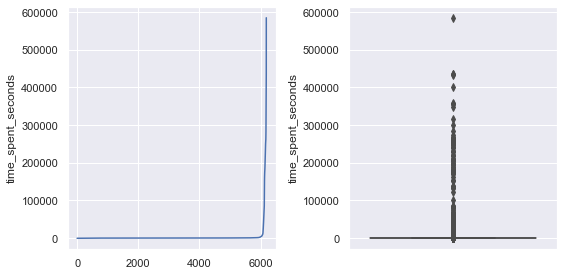

In [603]:
plt.subplots(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(np.sort(survey.time_spent_seconds))
plt.ylabel("time_spent_seconds")
plt.subplot(1,2,2)
sns.boxplot(survey.time_spent_seconds, orient="v")
plt.tight_layout()

# 25-75% percentille range = [234-470] -> See below
# 10-90% percentile range = [173-769.4] -> See below
# 5-95% percentile range = [124, 1337.9] -> See below
# Think about how to deal with extreme outliers. Cap it at 3600 secs? Lower cap at 0? 

In [604]:
d=survey.time_spent_seconds
print(d.quantile(.25), d.quantile(.75))
print(d.quantile(.10), d.quantile(.90))
print(d.quantile(.05), d.quantile(.95))
print(d.quantile(.03), d.quantile(.97))
print(d.quantile(.02), d.quantile(.98))
print(d.quantile(.01), d.quantile(.99))

234.0 470.0
173.0 769.4000000000005
124.0 1336.8999999999987
36.0 3404.880000000012
13.719999999999999 9468.71999999993
-171.14 134542.98000000103


In [668]:
print(d.quantile(.0155), d.quantile(.99))

4.0 134542.98000000103


In [605]:
survey[survey.time_spent_seconds <0].time_spent_seconds.describe()

count     93.000000
mean    -204.483871
std       63.427400
min     -297.000000
25%     -263.000000
50%     -211.000000
75%     -145.000000
max     -106.000000
Name: time_spent_seconds, dtype: float64

# 2. Investigate usage data

In [606]:
usage.head(3)

,user_id,duolingo_start_date,daily_goal,highest_course_progress,took_placement_test,purchased_subscription,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform
0,35cb7e8f72c911e9888edca9049399ef,2018-06-20 21:14:00,NaN,46.0,True,False,277.0,88,741.0,668.0,135,137
1,35ca34fd72c911e99ed6dca9049399ef,2017-08-08 05:01:00,NaN,50.0,True,False,62.0,16,57.0,57.0,6,453
2,35d1a54a72c911e98e25dca9049399ef,2014-10-15 17:55:00,1.0,71.0,False,False,202.0,29,315.0,295.0,55,1481


In [607]:
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6149 entries, 0 to 6148
Data columns (total 12 columns):
user_id                    6149 non-null object
duolingo_start_date        6149 non-null datetime64[ns]
daily_goal                 2687 non-null float64
highest_course_progress    6135 non-null float64
took_placement_test        6135 non-null object
purchased_subscription     6149 non-null bool
highest_crown_count        5857 non-null float64
n_active_days              6149 non-null int64
n_lessons_started          5993 non-null float64
n_lessons_completed        5993 non-null float64
longest_streak             6149 non-null int64
n_days_on_platform         6149 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(5), int64(3), object(2)
memory usage: 534.6+ KB


In [608]:
# There are only 6114 unique user Id's, there are 6149 survey obsevation 
usage.nunique()

user_id                    6114
duolingo_start_date        6126
daily_goal                    7
highest_course_progress      91
took_placement_test           2
purchased_subscription        2
highest_crown_count         439
n_active_days               166
n_lessons_started           958
n_lessons_completed         943
longest_streak              692
n_days_on_platform         1751
dtype: int64

In [609]:
usage.isnull().sum()

user_id                       0
duolingo_start_date           0
daily_goal                 3462
highest_course_progress      14
took_placement_test          14
purchased_subscription        0
highest_crown_count         292
n_active_days                 0
n_lessons_started           156
n_lessons_completed         156
longest_streak                0
n_days_on_platform            0
dtype: int64

In [610]:
user_list_usage=usage.user_id.value_counts()
repeated_users_usage=user_list_usage[user_list_usage >1]
len(repeated_users_usage)

35

In [611]:
# It seems resasonable to discard user data with duplicate user_id's. 
# Take more recently occured observations as
# this is ~1% of the total data?
usage[usage.user_id.isin(repeated_users_usage.index.to_list())].sort_values("user_id").head(10)

,user_id,duolingo_start_date,daily_goal,highest_course_progress,took_placement_test,purchased_subscription,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform
6043,35cbac4c72c911e9ae1edca9049399ef,2018-09-25 01:48:00,NaN,16.0,False,False,150.0,36,623.0,595.0,11,40
6010,35cbac4c72c911e9ae1edca9049399ef,2015-03-03 23:17:00,50.0,83.0,True,False,90.0,17,69.0,67.0,3,1342
6029,35cbb95972c911e99387dca9049399ef,2018-05-15 16:57:00,30.0,7.0,False,False,12.0,5,1.0,0.0,0,173
5996,35cbb95972c911e99387dca9049399ef,2017-08-08 14:50:00,NaN,35.0,True,True,107.0,93,415.0,399.0,114,453
6034,35cd197572c911e9bc27dca9049399ef,2018-07-04 08:52:00,30.0,29.0,False,False,58.0,44,134.0,128.0,7,123
6001,35cd197572c911e9bc27dca9049399ef,2018-06-05 20:54:00,NaN,44.0,True,False,95.0,92,538.0,512.0,147,152
6036,35cd2cb572c911e9ae3cdca9049399ef,2014-12-13 05:23:00,30.0,25.0,False,False,45.0,4,4.0,1.0,0,1422
6003,35cd2cb572c911e9ae3cdca9049399ef,2016-06-04 02:05:00,NaN,55.0,True,False,81.0,20,141.0,150.0,6000,883
6017,35cd830272c911e99cacdca9049399ef,2017-04-08 14:14:00,NaN,25.0,True,False,NaN,36,85.0,83.0,22,575
6051,35cd830272c911e99cacdca9049399ef,2015-10-09 19:22:00,NaN,49.0,True,False,28.0,20,87.0,73.0,5,1122


In [612]:
r_survey= set(repeated_users.index.to_list())
r_usage= set(repeated_users_usage.index.to_list())
r_survey.intersection(r_usage)

set()

In [613]:
# Convert dates to datetime objects
print(type(usage.duolingo_start_date[0]))
usage.duolingo_start_date[0]

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


Timestamp('2018-06-20 21:14:00')

In [614]:
# There can be no goals.
# Assign 3472 NaNs-> 0
usage.daily_goal.value_counts()

20.0    1046
30.0     584
50.0     523
10.0     476
1.0       55
16.0       2
32.0       1
Name: daily_goal, dtype: int64

In [615]:
# Negative progress? Set to 0
# Measuring highest_course progress
# 14 NaNs-> 0
usage.highest_course_progress.describe()

count    6135.000000
mean       27.314914
std        20.179992
min       -10.000000
25%        10.000000
50%        26.000000
75%        38.000000
max        83.000000
Name: highest_course_progress, dtype: float64

In [616]:
# 92 negative progress
usage.highest_course_progress[usage.highest_course_progress < 0]

6057   -8.0
6058   -4.0
6059   -3.0
6060   -2.0
6061   -7.0
       ... 
6144   -5.0
6145   -4.0
6146   -5.0
6147   -3.0
6148   -6.0
Name: highest_course_progress, Length: 92, dtype: float64

In [617]:
# Placement Y/N: NaN-> Didn't take it /False
usage.took_placement_test.value_counts()

False    3527
True     2608
Name: took_placement_test, dtype: int64

In [618]:
# Clean!!
usage.purchased_subscription.value_counts()

False    4208
True     1941
Name: purchased_subscription, dtype: int64

In [619]:
# Crown count
usage.highest_crown_count.describe()

count    5857.000000
mean      107.126515
std        97.168490
min         0.000000
25%        30.000000
50%        81.000000
75%       160.000000
max       617.000000
Name: highest_crown_count, dtype: float64

In [620]:
# Crown count: There are quite many with 0 values already.
# 292 NaNs-> 0
usage.highest_crown_count[usage.highest_crown_count == 0]

28      0.0
82      0.0
245     0.0
398     0.0
473     0.0
       ... 
5956    0.0
5979    0.0
6072    0.0
6112    0.0
6137    0.0
Name: highest_crown_count, Length: 83, dtype: float64

In [621]:
# How many days are in from Aug 1 2018 to Nov 5 2018? 
# Clean!!
# If users do not showe up here, then they did not log into duolingo during this period. 
# Consider this when merging this usage df with survey df 
usage.n_active_days.describe()

count    6149.000000
mean       49.150106
std        39.212910
min         1.000000
25%        12.000000
50%        44.000000
75%        85.000000
max       289.000000
Name: n_active_days, dtype: float64

In [622]:
# NaN->0
usage.n_lessons_completed.describe()

count    5993.000000
mean      233.634741
std       284.536445
min         0.000000
25%        49.000000
50%       153.000000
75%       311.000000
max      4686.000000
Name: n_lessons_completed, dtype: float64

In [623]:
# NaN->0
usage.n_lessons_started.describe()

count    5993.000000
mean      249.929918
std       300.918632
min         1.000000
25%        55.000000
50%       166.000000
75%       332.000000
max      4786.000000
Name: n_lessons_started, dtype: float64

In [624]:
# Clean!!
usage.longest_streak.describe()

count    6149.000000
mean      154.855586
std       617.272874
min         0.000000
25%         3.000000
50%        17.000000
75%        88.000000
max      6000.000000
Name: longest_streak, dtype: float64

In [625]:
# Clean!!
usage.n_days_on_platform.describe()

count    6149.000000
mean      615.571963
std       594.823322
min         2.000000
25%        99.000000
50%       417.000000
75%      1002.000000
max      2402.000000
Name: n_days_on_platform, dtype: float64

# 3. Clean the dataframes

In [626]:
# Simplify the age groups--Teens, Young adults, Middle aged, Older adults, Seniors.
age_to_category = {"Under 18":"T", "18-34":"Y", "35 - 54": "M", 
                   "55 - 74": "O", "75 or older": "S", np.nan: "M"}
survey.age = survey.age.replace(age_to_category) # prefer replace over map

In [627]:
# Simplify the income groups. 
income_to_category ={"$0 - $10,000":0, "$11,000 - $25,000":1, "$26,000 - $75,000":2, 
                     "$76,000 - $150,000":3, "$151,000 or more":4, np.nan:2}
survey.annual_income = survey.annual_income.replace(income_to_category)

In [628]:
# Simplify the platform names: Android, iOS, Web.
plat_to_category ={"Android phone or tablet":"A", "iPhone or iPad":"I", "Web browser":"W"}
survey.duolingo_platform = survey.duolingo_platform.replace(plat_to_category)

# For 276 null values:
np.random.seed(0)
elements=["A", "I", "W"]
probabilities=[2594/(2594+2496+821), 2496/(2594+2496+821), 821/(2594+2496+821)]
random_plat=np.random.choice(elements, 276, p=probabilities)

In [629]:
# Pre-cleaning distribution
survey.duolingo_platform.value_counts()

A    2594
I    2496
W     821
Name: duolingo_platform, dtype: int64

In [630]:
# Post-cleaning distribution
survey.iloc[survey[survey.duolingo_platform.isnull()].index.tolist(), 4] = random_plat
survey.duolingo_platform.value_counts()

A    2716
I    2610
W     861
Name: duolingo_platform, dtype: int64

In [631]:
# Simplify the subscriber groups. 
sub_to_category ={"No, I have never paid for Duolingo Plus":"NVR", 
                  "Yes, I currently pay for Duolingo Plus":"YES", 
                  "No, but I have previously paid for Duolingo Plus":"PST", 
                  "I don't know if I pay for Duolingo Plus":"IDK",
                  np.nan: "IDK"}
survey.duolingo_subscriber = survey.duolingo_subscriber.replace(sub_to_category)

In [632]:
# Simplify the usage-frequency groups. 
usage_to_category ={"Daily":"D", 
                  "Weekly":"W", 
                  "Monthly":"M", 
                  "Less than once a month":"S", # Seldom
                  "I don't use Duolingo":"S", np.nan:"S"}
survey.duolingo_usage = survey.duolingo_usage.map(usage_to_category)

In [633]:
# Some teens are retired..? For 44 teens with null employ
print(survey[survey.age=="T"].employment_status.value_counts())
print(len(survey[(survey.age=="T") & (survey.employment_status.isnull())]))


Unemployed            239
Employed part-time     27
Employed full-time     17
Retired                 2
Name: employment_status, dtype: int64
44


In [634]:
# Simplify the employment groups. 
emp_to_category ={"Employed full-time":"F", 
                  "Employed part-time":"P", 
                  "Retired":"R", 
                  "Unemployed":"U", np.nan:"U"}
survey.employment_status= survey.employment_status.replace(emp_to_category)

In [635]:
# Can't groupby with null values
# survey.groupby(['employment_status','age']).count().unstack(fill_value=0)

In [636]:
# Future contact groups. 
fut_to_category ={np.nan:"No"}
survey.future_contact= survey.future_contact.replace(fut_to_category)

In [637]:
# Simplify the employment groups. 
gen_to_category={"Prefer not to say":"Other", 
                  np.nan:"Other"}
survey.gender=survey.gender.replace(gen_to_category)

In [638]:
commit_to_category={"I'm extremely committed to learning this language.":4,
                    "I'm very committed to learning this language.":3,
                    "I'm moderately committed to learning this language.":2,
                    "I'm slightly committed to learning this language.":1,
                    "I'm not at all committed to learning this language.":0,
                    np.nan:0}
survey.primary_language_commitment=survey.primary_language_commitment.replace(commit_to_category)

In [639]:
review_to_category={"I am using Duolingo to learn this language for the first time.":"First",
                   "I am using Duolingo to review a language I've studied before.":"Review",
                   np.nan:"First"}
survey.primary_language_review=survey.primary_language_review.replace(review_to_category)

In [640]:
# 12 different reasons + Null values get mapped to numeric values
# Used a different approach as 
motiv_to_category=survey.primary_language_motivation.value_counts().index.to_list()
print(motiv_to_category) 

['I need to be able to speak the local language where I live', 'I want to use my time more productively', 'I am preparing for a trip', 'I want to keep my brain healthy', 'I want to connect with my heritage or identity', 'I want to improve relationships with some of the people in my life', 'I like to learn new languages', 'I want my family to learn a language together', 'I am interested in a culture that speaks this language', 'I want to advance professionally or economically', 'I want to challenge myself', 'I need to learn this language for school', "I don't want to forget what I've previously learned"]


In [641]:
survey.primary_language_motivation=survey.primary_language_motivation.astype(
    CategoricalDtype(categories=motiv_to_category)).cat.codes

In [642]:
prof_elements=["Beginner", "Intermediate", "Advanced"]
prof_probabilities=[3210/(3210+2460+357), 2460/(3210+2460+357), 357/(3210+2460+357)]
random_prof=np.random.choice(prof_elements, 160, p=prof_probabilities)

# Pre-cleaning distribution
survey.primary_language_proficiency.value_counts()

Beginner        3210
Intermediate    2460
Advanced         357
Name: primary_language_proficiency, dtype: int64

In [643]:
# Post-cleaning distribution
survey.iloc[survey[survey.primary_language_proficiency.isnull()].index.tolist(), 15] = random_prof
survey.primary_language_proficiency.value_counts()

Beginner        3303
Intermediate    2514
Advanced         370
Name: primary_language_proficiency, dtype: int64

In [644]:
stud_to_category={"Not currently a student":"No",
                  "Full-time student":"Full",
                  "Part-time student":"Part", np.nan:"No"}
survey.student=survey.student.replace(stud_to_category)

In [645]:
# Cap the time spent to 0 to 3600 (1 hour)
survey.iloc[survey[survey.time_spent_seconds<0].index.tolist(), -1]=0
survey.iloc[survey[survey.time_spent_seconds>3600].index.tolist(), -1]=3600

In [646]:
survey.time_spent_seconds.describe()

count    6187.000000
mean      489.349766
std       629.354142
min         0.000000
25%       234.000000
50%       325.000000
75%       470.000000
max      3600.000000
Name: time_spent_seconds, dtype: float64

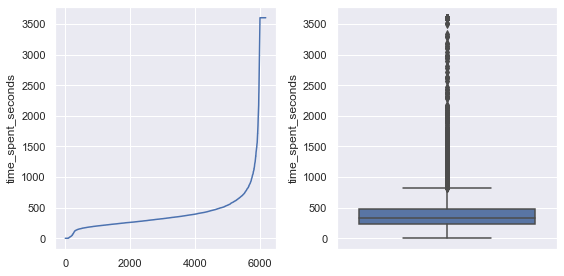

In [647]:
plt.subplots(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(np.sort(survey.time_spent_seconds))
plt.ylabel("time_spent_seconds")
plt.subplot(1,2,2)
sns.boxplot(survey.time_spent_seconds, orient="v")
plt.tight_layout()

# Still some outliers, but some may take long to fill out the survey. 
# I don't want to exclude too many slow typing users. 

In [648]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6187 entries, 0 to 6186
Data columns (total 19 columns):
user_id                                 6187 non-null object
age                                     6187 non-null object
annual_income                           6187 non-null int64
country                                 6187 non-null object
duolingo_platform                       6187 non-null object
duolingo_subscriber                     6187 non-null object
duolingo_usage                          6187 non-null object
employment_status                       6187 non-null object
future_contact                          6187 non-null object
gender                                  6187 non-null object
other_resources                         4474 non-null object
primary_language_commitment             6187 non-null int64
primary_language_review                 6187 non-null object
primary_language_motivation             6187 non-null int8
primary_language_motivation_followup    371

In [649]:
# Clean up other resources
print(survey.other_resources[0])
print(survey.primary_language_motivation_followup[6183])

Stories/novels/children's books,Movies/TV Shows
It's been a lifelong goal to learn this language,I want to learn as many languages as I can


In [650]:
import re
import nltk
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet, stopwords


survey.primary_language_motivation_followup= survey.primary_language_motivation_followup.replace({np.nan:""})
print("Original sample sentence: "+ survey.primary_language_motivation_followup[6183])

# lower case handling
survey["clean_motivation"]=survey.primary_language_motivation_followup.str.lower()
print("In lower case letters: "+ survey.clean_motivation[6183])

# handle no space
punct3 = r"[.,;!?](?! )"
survey["clean_motivation"]=survey["clean_motivation"].str.replace(pat=punct3, repl=". ", regex=True)
print("Handle missing spaces: "+survey.clean_motivation[6183])

# stop words removing
stop_words = stopwords.words("english")

remove_stop_words=lambda row: " ".join([word for word in row.split(" ") if word not in stop_words_updated])
survey["clean_motivation"]=survey["clean_motivation"].apply(remove_stop_words)
print("Stop words are removed: "+ survey.clean_motivation[6183])

# remove all punctuation
punct = r"[^\w\s]"
survey["clean_motivation"]=survey["clean_motivation"].str.replace(pat=punct, repl=" ", regex=True)
print("All punctuation marks removed: "+ survey.clean_motivation[6183])

# handle extra space
punct = r"\s+"
survey["clean_motivation"]=survey["clean_motivation"].str.replace(pat=punct, repl=" ", regex=True)
print("Extra white spaces removed: "+survey.clean_motivation[6183])


# stemized
#stemmer=LancasterStemmer()
#survey["clean_motivation"]=survey["clean_motivation"].apply(stemmer.stem)
#print("Stemmized: ", survey.clean_motivation[6183])

# tokenized and lemmatized
lemma = WordNetLemmatizer()

def lemmatize_word(tagged_token):
    """ Returns lemmatized word given its tag"""
    root = []
    for token in tagged_token:
        tag = token[1][0]
        word = token[0]
        if tag.startswith('J'):
            root.append(lemma.lemmatize(word, wordnet.ADJ))
        elif tag.startswith('V'):
            root.append(lemma.lemmatize(word, wordnet.VERB))
        elif tag.startswith('N'):
            root.append(lemma.lemmatize(word, wordnet.NOUN))
        elif tag.startswith('R'):
            root.append(lemma.lemmatize(word, wordnet.ADV))
        else:          
            root.append(word)
    return root

def lemmatize_doc(row):
    word_list = nltk.word_tokenize(row)
    tagged_token = pos_tag(word_list)#tokenized_word)
    lemmatized = lemmatize_word(tagged_token)
    return lemmatized

survey["clean_motivation_token"]=survey["clean_motivation"].apply(lemmatize_doc)

print("Lemmatized and Tokenized: ", survey.clean_motivation_token[6183], "\n")




### SAMPLE SENTENCE #2

survey.other_resources= survey.other_resources.replace({np.nan:""})
print("Original sample sentence: "+ survey.other_resources[0])

# lower case handling
survey["clean_resources"]=survey.other_resources.str.lower()
print("In lower case letters: "+ survey.clean_resources[0])

# handle no space
punct3 = r"[.,;!?](?! )"
survey["clean_resources"]=survey["clean_resources"].str.replace(pat=punct3, repl=". ", regex=True)
print("Handle missing spaces: "+survey.clean_resources[0])

# stop words removing
remove_stop_wordslambda= lambda row: " ".join([word for word in row.split(" ") if word not in stop_words])
survey["clean_resources"]=survey["clean_resources"].apply(remove_stop_words)
print("Stop words are removed: "+ survey.clean_resources[0])

# remove all punctuation
punct = r"[^\w\s]"
survey["clean_resources"]=survey["clean_resources"].str.replace(pat=punct, repl=" ", regex=True)
print("All punctuation marks removed: "+ survey.clean_resources[0])

# handle extra space
punct = r"\s+"
survey["clean_resources"]=survey["clean_resources"].str.replace(pat=punct, repl=" ", regex=True)
print("Extra white spaces removed: "+survey.clean_resources[0])

# Stemmized
#survey["clean_resources"]=survey["clean_resources"].apply(stemmer.stem)
# print("Stemmized: ", survey.clean_resources[0])

# tokenized and lemmatized
survey["clean_resources_token"]=survey["clean_resources"].apply(lemmatize_doc)
print("Lemmatized and Tokenized: ", survey.clean_resources_token[0])

Original sample sentence: It's been a lifelong goal to learn this language,I want to learn as many languages as I can
In lower case letters: it's been a lifelong goal to learn this language,i want to learn as many languages as i can
Handle missing spaces: it's been a lifelong goal to learn this language. i want to learn as many languages as i can
Stop words are removed: lifelong goal learn language. want learn many languages
All punctuation marks removed: lifelong goal learn language  want learn many languages
Extra white spaces removed: lifelong goal learn language want learn many languages
Lemmatized and Tokenized:  ['lifelong', 'goal', 'learn', 'language', 'want', 'learn', 'many', 'language'] 

Original sample sentence: Stories/novels/children's books,Movies/TV Shows
In lower case letters: stories/novels/children's books,movies/tv shows
Handle missing spaces: stories/novels/children's books. movies/tv shows
Stop words are removed: stories/novels/children's books. movies/tv shows
All

In [651]:
survey.head(3)

,user_id,age,annual_income,country,duolingo_platform,duolingo_subscriber,duolingo_usage,employment_status,future_contact,gender,...,primary_language_motivation,primary_language_motivation_followup,primary_language_proficiency,student,survey_complete,time_spent_seconds,clean_motivation,clean_motivation_token,clean_resources,clean_resources_token
0,35c9fc6e72c911e99681dca9049399ef,Y,2,JP,A,NVR,D,F,Yes,Male,...,6,"I want to learn as many languages as I can,Oth...",Advanced,No,1,193,want learn many languages can please specify,"[want, learn, many, language, can, please, spe...",stories novels children s books movies tv shows,"[story, novel, child, s, book, movie, tv, show]"
1,35c9fdde72c911e98630dca9049399ef,Y,2,JP,I,NVR,W,F,Yes,Male,...,0,"I am an immigrant,I am a refugee",Intermediate,No,1,139,immigrant refugee,"[immigrant, refugee]",,[]
2,35c9feb072c911e9ab4cdca9049399ef,Y,3,JP,I,YES,D,F,Yes,Male,...,4,,Beginner,No,1,119,,[],,[]


In [652]:
survey.drop(["clean_motivation", "clean_resources", 
             "primary_language_motivation_followup", "other_resources"], inplace=True, axis=1)
survey.columns = ["id", "age", "income", "country", "platform", "subscriber", "usage", "employment", "contact",
                 "gender", "commitment", "review", "motivation", "level", "student", "survey_comp", "survey_time",
                 "motivation_followup", "resources"]

In [653]:
survey.head(3)

,id,age,income,country,platform,subscriber,usage,employment,contact,gender,commitment,review,motivation,level,student,survey_comp,survey_time,motivation_followup,resources
0,35c9fc6e72c911e99681dca9049399ef,Y,2,JP,A,NVR,D,F,Yes,Male,3,Review,6,Advanced,No,1,193,"[want, learn, many, language, can, please, spe...","[story, novel, child, s, book, movie, tv, show]"
1,35c9fdde72c911e98630dca9049399ef,Y,2,JP,I,NVR,W,F,Yes,Male,1,Review,0,Intermediate,No,1,139,"[immigrant, refugee]",[]
2,35c9feb072c911e9ab4cdca9049399ef,Y,3,JP,I,YES,D,F,Yes,Male,2,Review,4,Beginner,No,1,119,[],[]


In [654]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6187 entries, 0 to 6186
Data columns (total 19 columns):
id                     6187 non-null object
age                    6187 non-null object
income                 6187 non-null int64
country                6187 non-null object
platform               6187 non-null object
subscriber             6187 non-null object
usage                  6187 non-null object
employment             6187 non-null object
contact                6187 non-null object
gender                 6187 non-null object
commitment             6187 non-null int64
review                 6187 non-null object
motivation             6187 non-null int8
level                  6187 non-null object
student                6187 non-null object
survey_comp            6187 non-null int64
survey_time            6187 non-null int64
motivation_followup    6187 non-null object
resources              6187 non-null object
dtypes: int64(4), int8(1), object(14)
memory usage: 876.2+ KB


In [655]:
# This still has 37 users who completed the survey twice. 
survey.to_csv("../Data_processed/survey_clean.csv")

In [656]:
usage.head(3)

,user_id,duolingo_start_date,daily_goal,highest_course_progress,took_placement_test,purchased_subscription,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform
0,35cb7e8f72c911e9888edca9049399ef,2018-06-20 21:14:00,NaN,46.0,True,False,277.0,88,741.0,668.0,135,137
1,35ca34fd72c911e99ed6dca9049399ef,2017-08-08 05:01:00,NaN,50.0,True,False,62.0,16,57.0,57.0,6,453
2,35d1a54a72c911e98e25dca9049399ef,2014-10-15 17:55:00,1.0,71.0,False,False,202.0,29,315.0,295.0,55,1481


In [657]:
usage.daily_goal=usage.daily_goal.replace({np.nan:0})
usage.highest_course_progress=usage.highest_course_progress.replace({np.nan:0})
usage.iloc[usage[usage.highest_course_progress<0].index.tolist(), 3] = 0
usage.took_placement_test=usage.took_placement_test.replace({np.nan:"False"})
usage.highest_crown_count=usage.highest_crown_count.replace({np.nan:0})
usage.n_lessons_started=usage.n_lessons_started.replace({np.nan:0})
usage.n_lessons_completed=usage.n_lessons_completed.replace({np.nan:0})

In [658]:
usage.head(3)

,user_id,duolingo_start_date,daily_goal,highest_course_progress,took_placement_test,purchased_subscription,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform
0,35cb7e8f72c911e9888edca9049399ef,2018-06-20 21:14:00,0.0,46.0,True,False,277.0,88,741.0,668.0,135,137
1,35ca34fd72c911e99ed6dca9049399ef,2017-08-08 05:01:00,0.0,50.0,True,False,62.0,16,57.0,57.0,6,453
2,35d1a54a72c911e98e25dca9049399ef,2014-10-15 17:55:00,1.0,71.0,False,False,202.0,29,315.0,295.0,55,1481


In [659]:
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6149 entries, 0 to 6148
Data columns (total 12 columns):
user_id                    6149 non-null object
duolingo_start_date        6149 non-null datetime64[ns]
daily_goal                 6149 non-null float64
highest_course_progress    6149 non-null float64
took_placement_test        6149 non-null object
purchased_subscription     6149 non-null bool
highest_crown_count        6149 non-null float64
n_active_days              6149 non-null int64
n_lessons_started          6149 non-null float64
n_lessons_completed        6149 non-null float64
longest_streak             6149 non-null int64
n_days_on_platform         6149 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(5), int64(3), object(2)
memory usage: 534.6+ KB


In [660]:
usage.describe()

,daily_goal,highest_course_progress,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform
count,6149.000000,6149.000000,6149.000000,6149.000000,6149.000000,6149.000000,6149.000000,6149.000000
mean,11.297609,27.340055,102.039356,49.150106,243.589201,227.707432,154.855586,615.571963
std,15.702263,20.065532,97.531815,39.212910,299.665026,283.295936,617.272874,594.823322
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
25%,0.000000,10.000000,24.000000,12.000000,49.000000,43.000000,3.000000,99.000000
50%,0.000000,26.000000,75.000000,44.000000,158.000000,145.000000,17.000000,417.000000
75%,20.000000,38.000000,155.000000,85.000000,327.000000,305.000000,88.000000,1002.000000
max,50.000000,83.000000,617.000000,289.000000,4786.000000,4686.000000,6000.000000,2402.000000


In [661]:
usage.to_csv("../Data_processed/usage_clean.csv")